In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
data = pd.read_csv('cleaned_car_data.csv')
data.head()

,name,make,year,age,mileage,transmission,colour,price
0,2000 BUICK CENTURY CUSTOM Sedan 4 Door,BUICK,2000,21,1.0,AUTOMATIC,CHAMPAGNE,357
1,2004 HONDA CIVIC LX,HONDA,2004,17,134095.0,AUTOMATIC,GRAY,850
2,1993 FORD MUSTANG LX,FORD,1993,28,99086.0,AUTOMATIC,WHITE,975
3,1998 HONDA CR-V LX,HONDA,1998,23,194018.0,AUTOMATIC,BLUE,925
4,1999 CHEVROLET TAHOE K1500 Wagon 4 Door,CHEVROLET,1999,22,264054.0,AUTOMATIC,GRAY,750


# Data Analysis

In [3]:
#the most expensive cars in the collection
data.nlargest(5, 'price')

,name,make,year,age,mileage,transmission,colour,price
5,2004 HONDA CIVIC EX,HONDA,2004,17,0.0,AUTOMATIC,GRAY,1000
6,2009 DODGE JOURNEY SE Wagon 4 Door,DODGE,2009,12,216676.0,AUTOMATIC,GREEN,1000
11,2008 HONDA ACCORD EXL,HONDA,2008,13,265938.0,AUTOMATIC,GRAY,1000
12,1999 FORD EXPLORER,FORD,1999,22,139990.0,AUTOMATIC,RED,1000
14,2010 DODGE CALIBER SX,DODGE,2010,11,176531.0,AUTOMATIC,BLACK,1000


In [4]:
#cars with the most miles in the collection
data.nlargest(5, 'mileage')

,name,make,year,age,mileage,transmission,colour,price
600,1989 BUICK REATTA Coupe,BUICK,1989,32,415811.0,AUTOMATIC,BLACK,850
19,2005 HONDA ACCORD LX,HONDA,2005,16,354898.0,AUTOMATIC,BLUE,599
298,2002 GMC YUKON,GMC,2002,19,348787.0,AUTOMATIC,WHITE,1000
251,1995 CHEVROLET K1500 Club Cab Pickup,CHEVROLET,1995,26,348540.0,AUTOMATIC,BLUE,800
311,1995 CHEVROLET K1500 Club Cab Pickup,CHEVROLET,1995,26,348540.0,AUTOMATIC,BLUE,775


In [5]:
#oldest cars in the collection
data.nlargest(5, 'age')

,name,make,year,age,mileage,transmission,colour,price
47,1979 CHEVROLET C10 D,CHEVROLET,1979,42,85061.0,AUTOMATIC,WHITE,900
135,1979 CHEVROLET C10 D,CHEVROLET,1979,42,85061.0,AUTOMATIC,WHITE,550
179,1979 CHEVROLET C10 D,CHEVROLET,1979,42,85061.0,AUTOMATIC,WHITE,1000
560,1982 Chevrolet S Truck S10 D Pickup 2 Door,CHEVROLET,1982,39,179818.0,AUTOMATIC,BLACK,700
809,1982 Chevrolet S Truck S10 D Pickup 2 Door,CHEVROLET,1982,39,179818.0,AUTOMATIC,BLACK,850


In [6]:
#drop the year column
data = data.drop('year', axis=1)

In [7]:
data.head()

,name,make,age,mileage,transmission,colour,price
0,2000 BUICK CENTURY CUSTOM Sedan 4 Door,BUICK,21,1.0,AUTOMATIC,CHAMPAGNE,357
1,2004 HONDA CIVIC LX,HONDA,17,134095.0,AUTOMATIC,GRAY,850
2,1993 FORD MUSTANG LX,FORD,28,99086.0,AUTOMATIC,WHITE,975
3,1998 HONDA CR-V LX,HONDA,23,194018.0,AUTOMATIC,BLUE,925
4,1999 CHEVROLET TAHOE K1500 Wagon 4 Door,CHEVROLET,22,264054.0,AUTOMATIC,GRAY,750


In [8]:
corr = data.corr()
corr

,age,mileage,price
age,1.000000,0.124639,-0.049808
mileage,0.124639,1.000000,-0.016489
price,-0.049808,-0.016489,1.000000


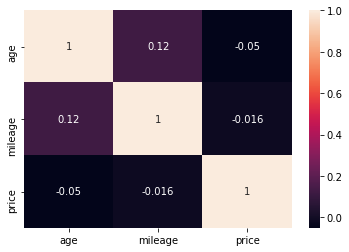

In [9]:
# heat map
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True);

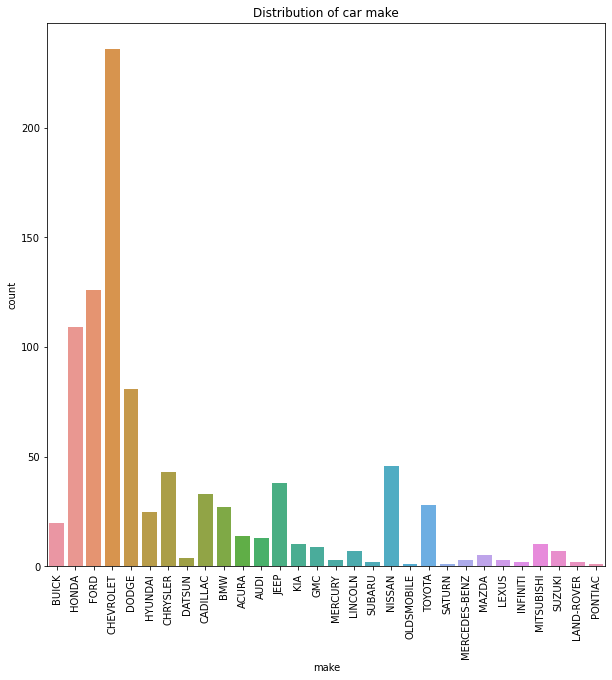

In [10]:
# count of cars by car make
fig = plt.figure(figsize=(10, 10))
sns.countplot(data.make);
plt.title("Distribution of car make")
plt.xticks(rotation=90);

In [11]:
# Categorical variable 
data.make.value_counts()

CHEVROLET        236
FORD             126
HONDA            109
DODGE             81
NISSAN            46
CHRYSLER          43
JEEP              38
CADILLAC          33
TOYOTA            28
BMW               27
HYUNDAI           25
BUICK             20
ACURA             14
AUDI              13
KIA               10
MITSUBISHI        10
GMC                9
SUZUKI             7
LINCOLN            7
MAZDA              5
DATSUN             4
LEXUS              3
MERCURY            3
MERCEDES-BENZ      3
SUBARU             2
LAND-ROVER         2
INFINITI           2
OLDSMOBILE         1
PONTIAC            1
SATURN             1
Name: make, dtype: int64

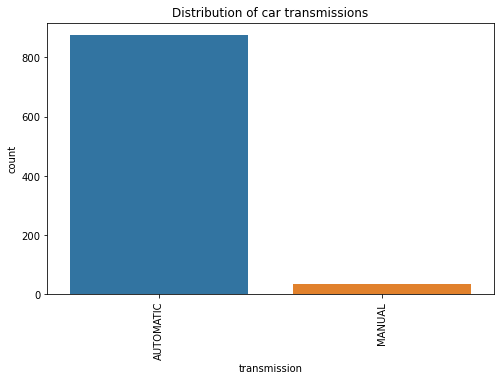

In [12]:
#count of cars by transmission
fig = plt.figure(figsize=(8, 5))
sns.countplot(data.transmission);
plt.title("Distribution of car transmissions")
plt.xticks(rotation=90);

In [13]:
# Categorical variable 
data.transmission.value_counts()

AUTOMATIC    874
MANUAL        35
Name: transmission, dtype: int64

In [14]:
# create a pivot table to find the average price per car make
data.pivot_table(values='price', index='make', aggfunc='mean')

,price
make,
ACURA,801.714286
AUDI,685.153846
BMW,805.962963
BUICK,647.850000
CADILLAC,739.090909
CHEVROLET,762.330508
CHRYSLER,720.325581
DATSUN,750.000000
DODGE,802.160494


<AxesSubplot:xlabel='age', ylabel='price'>

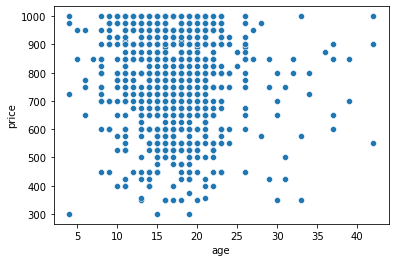

In [15]:
sns.scatterplot(x='age', y='price', data=data)

There is zero correlation between the age of the car and price of car

<AxesSubplot:xlabel='mileage', ylabel='price'>

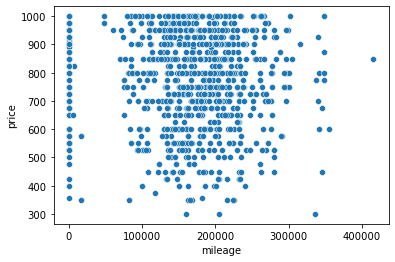

In [16]:
sns.scatterplot(x='mileage', y='price', data=data)

There is zero correlation between miles driven and price of car

<AxesSubplot:xlabel='age', ylabel='mileage'>

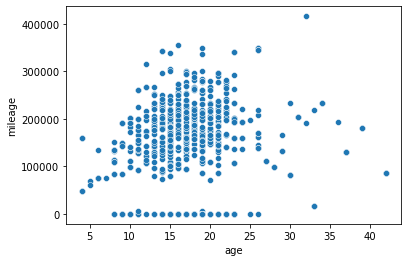

In [17]:
sns.scatterplot(x='age', y='mileage', data=data)

Text(0.5, 1.0, 'Box Plot of Age')

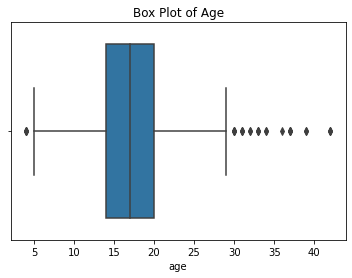

In [18]:
sns.boxplot(x='age', data = data)
plt.title("Box Plot of Age")

There are still outliers in the data but it's fine.

Text(0.5, 1.0, 'Box Plot of Mileage')

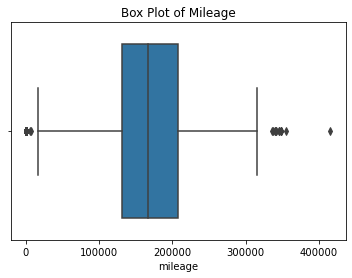

In [19]:
sns.boxplot(x='mileage', data = data)
plt.title("Box Plot of Mileage")

There are still outliers in the data but it's fine.

Text(0.5, 1.0, 'Box Plot of Transmission vs Price')

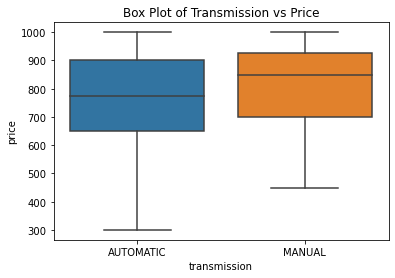

In [20]:
sns.boxplot(x="transmission", y="price", data=data)
plt.title("Box Plot of Transmission vs Price")

This shows a positive correlation. As the age of the car increases, the number of miles driven increases too

In [21]:
from wordcloud import WordCloud, STOPWORDS

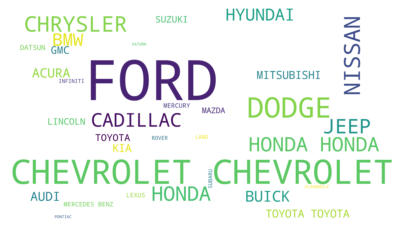

In [23]:
plt.subplots(figsize=(8,4))
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(data['make']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('cast.png')
plt.show()